In [ ]:
Step1 Problem Statement 
To build a machine learning model that can automatically classify emails as "spam" or "not spam" (also called "ham"),
based on the content and metadata of the emails
Labels: 1 for spam, 0 for not spam

In [1]:
#Library
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("emails.csv")

In [3]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [7]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [9]:
df.sample(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
2157,Email 2158,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4031,Email 4032,2,0,1,0,0,0,11,1,0,...,0,0,0,0,0,0,0,0,0,0
5061,Email 5062,2,2,1,0,0,1,11,1,0,...,0,0,0,0,0,0,0,0,0,0
4443,Email 4444,16,2,1,0,2,4,66,3,4,...,0,0,0,0,0,0,0,0,0,0
865,Email 866,8,3,1,2,5,1,22,2,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
the,5172.0,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,3.075599,6.045970,0.0,0.0,1.0,3.0,89.0
for,5172.0,3.124710,4.680522,0.0,1.0,2.0,4.0,47.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,0.004060,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [15]:
df.shape

(5172, 3002)

In [17]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [19]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [21]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [23]:
df.nunique()

Email No.     5172
the             90
to              72
ect             90
and             53
              ... 
military         4
allowing         3
ff              23
dry              4
Prediction       2
Length: 3002, dtype: int64

In [25]:
df.duplicated().sum()

0

In [27]:
df = df.drop("Email No.", axis=1)

In [29]:
df["Prediction"].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

C:\Users\soniv\AppData\Local\Temp\ipykernel_17972\968969872.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Prediction"], data=df, palette="coolwarm")


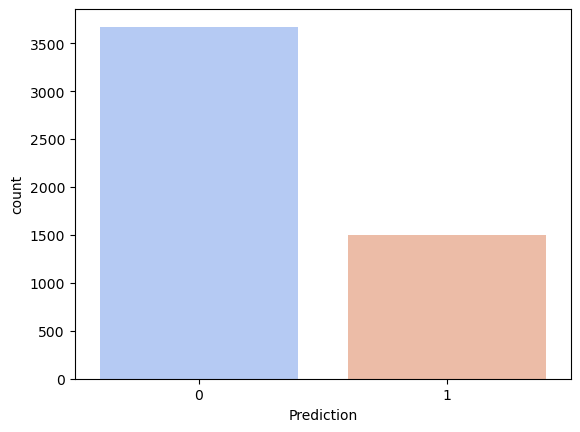

In [31]:
sns.countplot(x=df["Prediction"], data=df, palette="coolwarm")
plt.show()

In [33]:
#Split data 
X = df.drop("Prediction", axis=1)
Y = df["Prediction"]

In [58]:
#Fitting Data in Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [62]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape )

(4137, 3000) (1035, 3000) (4137,) (1035,)


In [78]:
lr = LogisticRegression(solver='liblinear')

In [80]:
lr.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [82]:
y_pred = lr.predict(X_test)

In [84]:
#Measuring Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [86]:
y_pred = (y_pred >= 0.5).astype(int)

In [88]:
accuracy_score(y_pred, Y_test)

0.9729468599033816

In [90]:
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       735
           1       0.96      0.95      0.95       300

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035

